# Assignment 4a Cognitive Modelling

Dit is de eerste helft van de vierde opdracht voor Cognitive Modelling. Het totaal aantal punten dat je voor assignment 4a kan halen is __49 punten__.

Bij elke vraag staat de hoeveelheid punten die je er voor kan krijgen. Geef antwoorden in blokken met code of met tekst. Gebruik voor antwoorden met tekst de ">" voor blockquotes en geef bij elke vraag ook __kort uitleg__ als hier om wordt gevraagd. __Let op__: soms staan er meerdere vragen bij een onderdeel, lees de tekst dus nauwkeurig. 

Sla het uiteindelijke notebook op met jullie studentnummers en achternamen in de filenaam: `studentnummer_achternaam_opdrachtnummer`.

In [2]:
import math
import numpy as np
from scipy import optimize

%matplotlib inline
import matplotlib.pyplot as plt

<br>

## Part 1

In reinforcement learning and artifical intelligence wordt eigenlijk maar weinig gekeken naar keuzes, ook al is het maken van eigen (goede?) keuzes een belangrijk aspect van mens zijn. Daarnaast weet iedereen dat kiezen helemaal niet altijd makkelijk is. In de meest algoritmes waar we nu naar hebben gekeken zag je dat er óf een exploratie keuze was óf simple max Q werd gekozen (de optie met de hoogste verwachte uitkomst). 

In de kleine werelden van spellen is vaak heel duidelijk gedefineerd wat de belonging is of hoeveel punten je ergens voor krijgt en is meer punten altijd beter dan minder. Maar in de echte wereld is dit niet altijd het geval en zijn gevolgen ook niet altijd even duidelijk. Ook hebben we in het morele domein gezien dat een simpele calculus (hoeveel doden vallen er in het trolly dilemma) niet altijd is hoe wij zouden willen dat een A.I. keuzes maakt. 

We gaan in onderstaande opdracht naar een aantal modelen kijken van keuze gedrag, dit moet je een idee geven hoe je dit zou kunnen implementeren.

<br>

## 1. The pizza problem 🍕

Wat goed is, is vaak subjectief. Stel je voor dat het vrijdagavond is, en je favoriete pizzeria heeft een speciale aanbieding: twee 12 inch pizza's voor de prijs van één 18 inch pizza. Laat we voor het gemak zeggen dat een 18 inch pizza 10 euro kost. Wat zou jij kiezen? 

![](Images\pizza_problem_guest_martin_2020.png)

Is dit een goede aanbieding? Het antwoord is... dat ligt er aan. Deze vraag is eens op twitter gesteld en er kwamen verassend veel verschillende antwoorden (Guest & Martin, 2020). Sommige vonden van wel, andere hadden een goede reden waarom niet. Zo zei iemand dat twee pizzas meer is dan één, maar een ander zei dat de ene pizza in totaal meer pizza is dan de twee kleine samen.

Welke optie je moet kiezen ligt er aan waar je het meeste waarde aan hecht, oftewel wat heeft het grootste nut (utilitiy)? 

<br>

### Q1.a (3 pts)

Schrijf een _Utilitiy Functie_ `def utility_area()` die het nut van een aantal pizza's berekent zoals sommige mensen dat doen: op basis van de totale oppervlakte. Welke optie zouden deze mensen kiezen: 2 pizza's van 12 inch, 1 pizza van 18 inch, of 3 pizza's van 10 inch?

ps. 12" pizza betekent een diameter van 12" inch

In [29]:
def utility_area(diameter, n_pizzas):
    # TO DO
    area = np.pi * (diameter / 2) ** 2
    return area * n_pizzas

util_18 = utility_area(18, 1)
util_10 = utility_area(10, 3)
print(f"Utility of 1 pizza with diameter 18: {util_18}")
print(f"Utility of 3 pizzas with diameter 9: {utility_area(9, 3)}")
print(f"Utility of 3 pizzas with diameter 10: {util_10}")
print(f'Utility of 2 pizzas with diameter 12: {utility_area(12, 2)}')

Utility of 1 pizza with diameter 18: 254.46900494077323
Utility of 3 pizzas with diameter 9: 190.85175370557994
Utility of 3 pizzas with diameter 10: 235.61944901923448
Utility of 2 pizzas with diameter 12: 226.1946710584651


Ik heb een theorie dat de mensen die voor twee pizza's zouden gaan in plaats van voor één pizza, de korst lekkerder vinden dan de binnenkant van de pizza. Ik wil kijken of deze theorie het gedrag van deze mensen kan verklaren.
Het totale nut van een pizza is nu dus uitgedrukt in het nut (oppervlakte) van de korst plus het nut van de binnenkant van de pizza.

### Q1.b (4 pts)
Schrijf een _Utilitiy Functie_ `def utility_yummy_crust()` die personen beschrijft die een $x$ aantal keer meer houden van de korst dan van de binnenkant van de pizza.

Laten we er van uit gaan dat de korst 1" inch dik is. Hoeveel moet een persoon de korst op z'n minst lekkerder vinden om te kiezen voor de optie met twee pizzas? De utility (oppervlakte) van de korst is hierbij dus $x$ keer hoger dan de utility van de binnenkant. Een ongeveer antwoord is goed, maar je kan de parameter ook optimaliseren. 


In [28]:
def utility_yummy_crust(diameter1, n_pizzas1, diameter2, n_pizzas2):
    # TO DO 
    area_no_crust1 = utility_area(diameter=diameter1-2, n_pizzas=n_pizzas1)
    area_with_crust1 = utility_area(diameter=diameter1, n_pizzas=n_pizzas1)
    area_crust1 = area_with_crust1 - area_no_crust1
    area_no_crust2 = utility_area(diameter=diameter2-2, n_pizzas=n_pizzas2)
    area_with_crust2 = utility_area(diameter=diameter2, n_pizzas=n_pizzas2)
    area_crust2 = area_with_crust2 - area_no_crust2
    return (-area_no_crust1 + area_no_crust2) / (area_crust1 - area_crust2)

util_18_1 = utility_yummy_crust(12, 2, 18, 1)
print(util_18_1)
util_9_3 = utility_yummy_crust(9, 3, 18, 1)
print(util_9_3)

2.799999999999999
3.892857142857139


Dit is slechts een hypothetisch voorbeeld over hoe je een psychologische theorie over keuzegedrag kan formaliseren in een wiskundige formule. Dit kan heel erg behulpzaam zijn want deze precieze voorspellingen kunnen makkelijk getoetst worden in de toekomst. 

### Q1.c (2 pts)
Stel dat je nu tot de hypothese gekomen bent dat mensen de korst van de pizza 3 keer zo lekker vinden als de binnenkant. Zal deze persoon nog liever drie pizzas van 9 inch willen? 

> *Antwoord*\
Als het persoon liever 3 pizzas van 9 inch heeft dan één pizza van 18 inch, zou hij de korst 3,89 keer zo lekker moeten vinden. Dus dit hypotetisch persoon zou nogsteeds moeten kiezen voor de 18 inch pizza.

<br>

---

## 2. Een loterij 💰 

 Bijna alle keuzes in het dagelijks leven hebben een element van kans of onzekerheid. Op je fiets naar de campus, net oversteken bij het rode licht, etc. Je houding ten opzicht van risico's bepaalt ook veel van de keuzes die je in het leven maakt. Ga je een stage doen in het buitenland bij een onbekende groep? Of blijf je lekker op de vertrouwde campus?

Zoals in het college besproken, worden loterijen vaak gebruikt om te bestuderen hoe mensen met risico en onzekerheid omgaan. De hoofdprijs uit de loterij is fantastisch, maar het is heel onzeker (de kans is klein) dat je deze ook echt krijgt. Hier gaan we kort kijken naar die modellen en toepassen op jouw eigen keuzes, om zo te begrip te krijgen hoe jij met risico/onzekerheid omgaat. 

### Mini-experiment
In de bijlage `Risk_Q.pdf` vind je een lijst met keuzes tussen twee loterijen, zoals in het figuur hieronder. Voor elke loterij zijn er telkens twee mogelijke uitkomsten, aan jou de vraag welke loterij je zou kiezen als je er een moet uitkiezen. Kijk goed naar de uitkomsten en kansen en vink aan welke loterij je kiest.

<img src="Images\loterij.png" style="width: 750px;"/>


### Q2 (5 pts)

Als je alle keuzes gemaakt hebt, gebruik dan `data_self.txt` om je eigen keuzes op te slaan, onder jouw naam `studentnummer_data.txt`:

        p1,o1,p2,o2: p's and o's of gamble 1  (p is probability, o is outcome)
        p3,o3,p4,o4: p's and o's of gamble 2 
        decision: choice (1 = gamble 1, 2 = gamble 2)

<img src="Images\example_data.png" style="width: 650px;"/>

Zorg dat je dit databestand inlevert op Canvas, anders krijg je geen punten voor deze opdracht.

<br>

---

## 3. Prospect Theory

Prospect theory, ook wel cumulative prospect theory (CPT), is een theorie die beschrijft hoe mensen uitkomsten en waarschijnlijkheden wegen en tot een beslissing komen. Het gebruikt hiervoor een combinatie van vier verschillende functies:

1. Een functie die objectieve uitkomsten transformeert naar subjectieve waarde $v(x)$
2. Een functie die waarschijnlijkheid transformeert naar subjectieve waarschijnlijkheid $w(p)$
3. Een functie die subjectieve waarden en waarschijnlijkheden van een optie integreert tot een subjectieve verwachte waarde (expected value) $EV(x)$
4. Een beslis regel die uitrekent met welke waarschijnlijkheid een van twee opties wordt gekozen (in dit geval $P_x$) (de $U$ in de functie staat voor Utility, of expected value).

<h1 style="background-color:LightGray;"><img src="Images\functions.png"></h1>

<br> <br>

### Q3.a (9 pts)

Schrijf voor elke van deze 4 functies een functie in Python. Geef bij elke functie aan welke vrije variabelen deze heeft en wat die betekenen.


In [58]:
def cpt_sub_value(x, alpha, beta, _lambda):
    # TO DO
    return x**alpha if x >= 0 else -_lambda * (-x)**beta
    
def cpt_prob_weight(p, gamma):
    # TO DO
    return p**gamma / (p**gamma + (1 - p)**gamma)**(1/gamma)

def cpt_ev(x, p):
    # TO DO
    return p * x

def cpt_choice(U_x, U_y, theta):
    # TO DO
    return 1 / (1 + np.exp(-theta * (U_x - U_y)))

> *Antwoord*\
X: De waarde, in een loterij waar 100 euro te winnen is, zal dit 100 zijn.\
Alpha: Beinvloed het nemen van positiefe risico's (zoals 100 euro winnen).\
Beta: Beinvloed het nemen van negatieve risico's (zoals 100 euro verliezen).\
Lambda: De verhouding tussen verliezen en winnen, hoe erg word verliezen gemeden ten opzichte van winnen.\
P: De waarschijnlijkheid van het winnen van de loterij, in een loterij waar er 10 procent kans is op 100 euro zal dit 0.1 zijn.\
Gamma: Een waarschijlijkheids coefficient, er is een objectieve waarschijnlijkheid die word vervormd door de subjectieve coefficient gamma.\
Theta: Inverse temperature, veranderd de impact van het verschil in EV's op het maken van een keuze.


<br>

### Q3.b (4 pts)

Plot de subjectieve waarde functie `cpt_sub_value` voor objectieve waardes tussen 0 en 1000, gebruik makende van verschillende waarden van $\alpha$, elke in een aparte grafiek:

$$\alpha \in \{0.7, 1.3, 1.7\}$$

*Hint:* Gebruik [vectorize](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html) om een bestaande functie op een gehele [ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) tegelijk te kunnen toepassen, en zo alle subjectieve waardes in 1 keer uit te rekenen. (zie onderstaand voorbeeld voor  alpha = 0.8)

    vec_sub_value = np.vectorize(cpt_sub_value, excluded=[1,2,3])

    x = np.array(range(1000))
    for alpha in [0.8]:
        y = vec_sub_value(x, alpha, 0, 0)
        plt.plot(x, y, label=r'$\alpha =$'+str(alpha))

    plt.legend()
    plt.show()

De meeste mensen zijn risicomijdend, welke grafiek beschrijft dus het best het gedrag van mensen? Leg uit. 

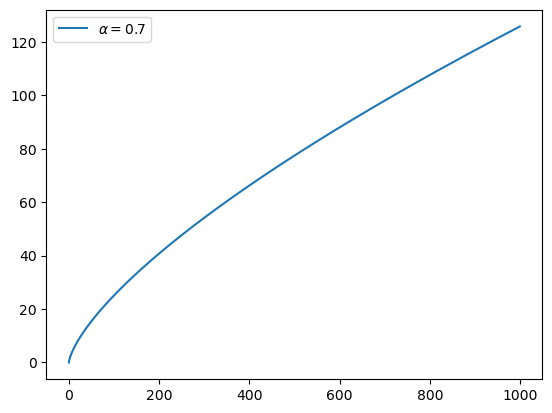

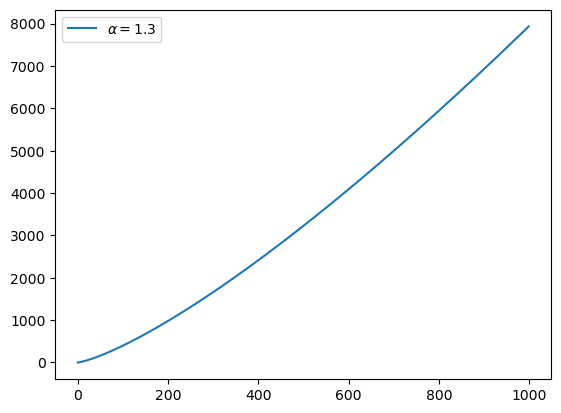

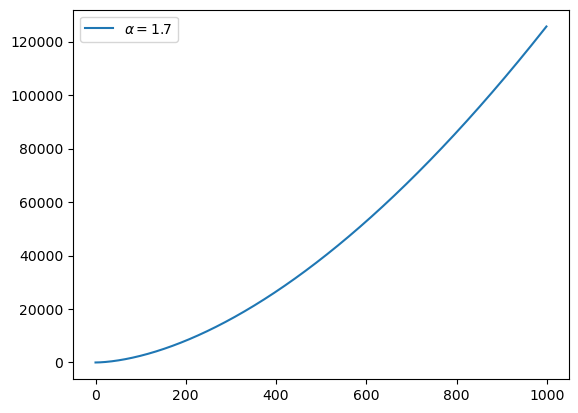

In [81]:
# TO DO
vec_sub_value = np.vectorize(cpt_sub_value, excluded=[1,2,3])

x = np.array(range(1000))
for alpha in [0.7, 1.3, 1.7]:
    y = vec_sub_value(x, alpha, 0, 0)
    plt.plot(x, y, label=r'$\alpha =$'+str(alpha))
    plt.legend()
    plt.show()

> *Antwoord*\
De alpha van 0.7 laat het gedracht van de meeste mensen zien, namelijk risico mijdend. Dit is te halen uit het feit dat lage waardes meer subjectieve waarde krijgen.

<br>

### Q3.c (4 pts)

Plot de subjectieve waarde functie `cpt_sub_value` voor objectieve waardes tussen 0 en -1000, gebruik makende van verschillende waarden van $\beta$ en $\lambda$, en label deze lijnen voor:

$$\beta = 0.7$$
$$\lambda \in \{0.5, 1.5\}$$

De meeste mensen vinden verliezen van 200 euro relatief erger dan dat ze blij zijn met het winnen van 200 euro, dus welke waarde van $\lambda$ pas het best bij menselijk gedrag? (hint kijk dus ook weer even naar grafiek met $\alpha$ hierboven)

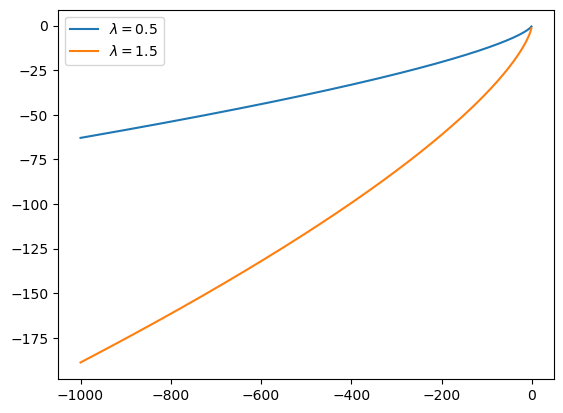

In [85]:
# TO DO
vec_sub_value = np.vectorize(cpt_sub_value, excluded=[1,2 ,3])
x = np.array(range(-1000,0))
for _lamda in [0.5, 1.5]:
    y = vec_sub_value(x, 0, 0.7, _lamda)
    plt.plot(x, y, label=r'$\lambda =$'+str(_lamda))
plt.legend()
plt.show()

> *Antwoord*\
De lambda van 0.5 lijkt pas bij 0 te gaan stijgen, dit gedrag laat zien dat winnen een stuk belangrijker is dan verliezen. De lambda van 1.5 hegt een hele lage negatieve waarde aan verlies van 1000 (euro?). Lambda van 1.5 zal dus beter het gemiddelde menselijk gedrach modeleren.

<br>

### Q3.d (3 pts)

Plot de waarschijnlijkheids functie `cpt_prob_weight` die waarschijnlijkheden tussen $0.1$ en $0.9$ omzet naar subjectieve waarschijnlijkheden, gebruik makende van verschillende waarden van $\gamma = {0.5, 0.75, 1, 1.25, 1.5}$, en label deze lijnen.

Wat staat er op de x-as? En op de y-as? Bij welke waarde(s) van gamma vind je het gebruikelijke patroon dat mensen laten zien? (zie grafiek in college slides, plot ook een identity line $(x=y)$).

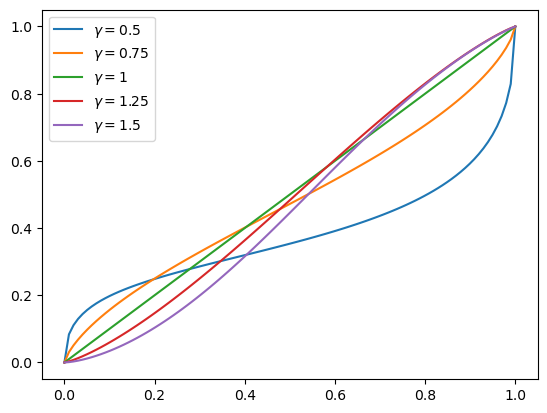

In [51]:
vec_prob_weight = np.vectorize(cpt_prob_weight, excluded=[1])
# TO DO
x = np.linspace(0, 1, 100)
for gamma in [0.5, 0.75, 1, 1.25, 1.5]:
    y = vec_prob_weight(x, gamma)
    plt.plot(x, y, label=r'$\gamma =$'+str(gamma))
plt.legend()
plt.show()

> *Antwoord*\
Op de x-as staat de objectieve kans en op de y-as staat de subjectieve kans die een persoon aan die objectieve kans zal geven.\
Alle waardes boven de 1 modelleren menselijk gedrag, aangezien mensen het spannender vinden om een kans van 10 procent te nemen dan een kans van 90 procent, onafhankelijk van de waarde.

<br>

### Q3.e (3 pts)

Laten we nu kijken naar hoe verschillende parameter waarden kunnen leiden tot verschillende keuzes. Laten we er voor het gemak even vanuit gaan dat de proefpersoon altijd simpelweg de optie kiest met de hoogste verwachtte uitkomst. Beschouw de volgende twee opties:

    A: 1% kans op 1000 euro, en anders niets 
    B: 50% kans op 20 euro, en anders niets

Vergelijk de uitkomsten voor de 4 mogelijke combinaties met $\alpha \in \{0.3, 1.5\}$ en $\gamma \in \{0.5, 2.0\}$ en vertel welke loterij verkozen wordt. 

In [54]:
# TO DO
for alpha, gamma in [(0.3, 0.5), (0.3, 2), (1.5, 0.5), (1.5, 2)]:
    value1000 = cpt_sub_value(1000, alpha, 0, gamma)
    vaule20 = cpt_sub_value(20, alpha, 0, gamma)

    prob1000 = cpt_prob_weight(0.01, gamma)
    prob20 = cpt_prob_weight(0.5, gamma)

    ev1000 = cpt_ev(value1000, prob1000)
    ev20 = cpt_ev(vaule20, prob20)
    
    choise = f'choice: A with EV={ev1000}' if ev1000 > ev20 else f'choice: B with EV={ev20}'

    print(f"alpha: {alpha}, gamma: {gamma},", choise)


alpha: 0.3, gamma: 0.5, choice: B with EV=0.8684883661098433
alpha: 0.3, gamma: 2, choice: B with EV=0.8684883661098433
alpha: 1.5, gamma: 0.5, choice: A with EV=2637.4347680823494
alpha: 1.5, gamma: 2, choice: B with EV=31.622776601683793


> *Antwoord*\
De waardes en keuzes staan geprint hierboven.

<br>

---

## 4. Model fitting 🏋

We gaan nu kijken naar de resultaten van een echt experiment. We hebben de data van een aantal proefpersonen die een heel aantal loterijen heeft gespeeld. In de data file kunnen we terugvinden welke van 2 opties zij gekozen hebben. We gaan kijken hoe goed CPT het gedrag van de proefpersonen kan voorspellen, en wat voor een parameter waardes dit oplevert. De data file die we zullen gebruiken is `data_LC4.txt`:

    Data Coding:
    Subject: is subject nr.
    p1,o1,p2,o2:    p's and o's of gamble 1  (p is probability, o is outcome)
    p3,o3,p4,o4:    p's and o's of gamble 2 
    decision:       choice (1 = gamble 1, 2 = gamble 2)
   
Elke gamble wordt beschreven, net als hierboven, door twee kansen en twee uitkomsten. 
Schrijf een `CPT_fit` functie zodat je deze op de data van de proefpersonen kan fitten. 
We gaan voor het fitten van het model gebruik maken van [optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) en we gaan proberen Log Likelihood te maximaliseren. Net als in de vorige notebooks. 

In het databestand van de proefpersoon kunnen we zien welke van de 2 loterijen de proefpersoon koos. Wat we op elke trial willen weten is wat de waarschijnlijkheid is dat het model dezelfde keuze maakt als de proefpersoon, gegeven de huidige parameter waardes. Hoe hoe groter die kans (likelihood) is hoe beter het model fit.

<br>

### Q4.a (8 pts)

Gebruik de onderstaande code en  functie `CPT_fit`. Deze functie kan worden gebruikt om de parameters van CPT te vinden die het best de keuzes van een persoon beschrijven.

We gebruiken als startwaarden $\alpha=0.5$, $\beta=0.5$, $\lambda=0.5$, $\gamma=0.5$ en $\theta=0.05$, en gebruik [Nelder-Mead](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html#optimize-minimize-neldermead) als de methode voor de minimalisatie.

ps. RuntimeWarning: divide by zero encountered in double_scalars kan soms voorkomen, dat is niet per se een probleem. 


In [59]:
def CPT_fit(params, games, choices):
    alpha, beta, labda, gamma, theta = params
    l, m = games.shape[1], games.shape[1] // 4
    
    # calculate subjective values based
    sub_outcomes = vec_sub_value(games[:, range(1,l,2)], alpha, beta, labda) # o1, o2, o3, o4
    
    # calculate subjectieve probabilities
    sub_probs = vec_prob_weight(games[:, range(0,l,2)], gamma) # p1, p2, p3, p4
    
    # calculate expected values
    vec_EV = np.vectorize(cpt_ev)
    expected_v = vec_EV(sub_outcomes, sub_probs)
    
    # calculate probability of choosing the first option
    ss = vec_choice(np.sum(expected_v[:, :m], axis=1, keepdims=True),
                    np.sum(expected_v[:, m:], axis=1, keepdims=True), theta)
    
    # make a list with probabilities of first and second option 
    ls = np.concatenate([ss, 1 - ss], axis=1)
    
    # select the probabilities of the choice of the subject
    probs_of_choice = [probs[choice-1] for probs, choice in zip(ls, choices)]
    
    return -1 * np.sum(np.log(probs_of_choice))



vec_choice = np.vectorize(cpt_choice, excluded=[2])

with open("data_LC4.txt") as f:
    data = np.loadtxt(f, dtype=float, delimiter="\t", skiprows=1)

games = data[:,3:11]               # p1, o1, p2, o2, p3, o3, p4, o4
choices = data[:, 12].astype(int)  # 1 or 2

fit = optimize.minimize(CPT_fit, x0 = np.array([0.5, 0.5, 0.5, 0.5, 0.05]),
                        method='Nelder-Mead', args=(games, choices)) 

print(fit.message, '\nNumber of iters:',fit.nit, '\nOptimisation succes?', fit.success, '\n\nParametervalues:')
var = ['alpha', 'beta', 'lambda', 'gamma', 'theta']
for i in range(5):
    print(var[i]+" = %.5f" % fit.x[i])
    
print('\n',fit.fun)

Optimization terminated successfully. 
Number of iters: 435 
Optimisation succes? True 

Parametervalues:
alpha = 0.78490
beta = 0.77179
lambda = 1.32460
gamma = 0.86570
theta = 0.04443

 772.5194035645293


Welke parameterwaarden fitten de data van de proefpersonen het beste? En als we deze parameters voor waar aannemen, hoe kijken deze proefpersonen tegen winsten en verliezen aan? Hoe weegt deze persoon waarschijnlijkheden? (oftwel beschrijf de parameter waardes in normale mensen taal)

> *Antwoord*\
Alpha: Een alpha van 0.78 is risico mijdend, dit houd in dat lage objectieve waardes meer subjectieve waarde krijgen.\
Beta: Een beta van 0.77 betekend dat het persoon niet graag verliest, dit uit zich in een oplopend stijgende grafiek tot 0.\
Lambda: Een lambda van boven 1 (1.32) duid op de verhouding tussen winnen en verliezen, boven 1 wil zeggen dat het persoon minder risco's neemt als er veel te verliezen is dan als er veel te winnen is.\
Gamma: Een gamma onder 1 (0.87) duid op een hogere subjectieve waarde voor lagere kansen (onder de 0.5).\
Theta: Een lage theta (0.044) betekend dat het persoon vrij in lijn ligt met de verschillen in EV en daar naar handeld. Er is dus weinig willekeur in de keuzes.

<br>

### Q4.b (4 pts)
Maak gebruik van bovenstaande functie en fit die op je eigen data `studentnummer_data.txt`. Wat zijn jouw parameter schattingen en wat betekenen die?

In [72]:
# TO DO
def CPT_fit(params, games, choices):
    alpha, beta, labda, gamma, theta = params
    l, m = games.shape[1], games.shape[1] // 4
    
    # calculate subjective values based
    sub_outcomes = vec_sub_value(games[:, range(1,l,2)], alpha, beta, labda) # o1, o2, o3, o4
    
    # calculate subjectieve probabilities
    sub_probs = vec_prob_weight(games[:, range(0,l,2)], gamma) # p1, p2, p3, p4
    
    # calculate expected values
    vec_EV = np.vectorize(cpt_ev)
    expected_v = vec_EV(sub_outcomes, sub_probs)
    
    # calculate probability of choosing the first option
    ss = vec_choice(np.sum(expected_v[:, :m], axis=1, keepdims=True),
                    np.sum(expected_v[:, m:], axis=1, keepdims=True), theta)
    
    # make a list with probabilities of first and second option 
    ls = np.concatenate([ss, 1 - ss], axis=1)
    
    # select the probabilities of the choice of the subject
    probs_of_choice = [probs[choice-1] for probs, choice in zip(ls, choices)]
    
    return -1 * np.sum(np.log(probs_of_choice))



vec_choice = np.vectorize(cpt_choice, excluded=[2])

with open("15102920_data.txt") as f:
    data = np.loadtxt(f, dtype=float, delimiter="\t", skiprows=1)

games = data[:,0:8]               # p1, o1, p2, o2, p3, o3, p4, o4
choices = data[:, 9].astype(int)  # 1 or 2
fit = optimize.minimize(CPT_fit, x0 = np.array([0.5, 0.5, 0.5, 0.5, 0.05]),
                        method='Nelder-Mead', args=(games, choices)) 

print(fit.message, '\nNumber of iters:',fit.nit, '\nOptimisation succes?', fit.success, '\n\nParametervalues:')
var = ['alpha', 'beta', 'lambda', 'gamma', 'theta']
for i in range(5):
    print(var[i]+" = %.5f" % fit.x[i])
    
print('\n',fit.fun)

Maximum number of function evaluations has been exceeded. 
Number of iters: 633 
Optimisation succes? False 

Parametervalues:
alpha = 0.79639
beta = 700.24781
lambda = 134.84949
gamma = 0.11652
theta = 98.13415

 2.457927610607839


> *Antwoord*\
Het is niet gelukt om de parameters die mijn keuzes beschrijven te benaderen. Echter kunnen we wel de laatste iteratie bespreken:\
Alpha: Dit is een vergelijkbare waarde met die van de proefpersoon. Het heeft dus ook dezelfde betekenis\
Beta: De beta is ontzettend hoog, deze waarde is niet echt interpreteerbaar en een fout.\
Lambda: Dit is opnieuw een absurd hoge waarde, in de richting van risico mijding.\
Gamma: Een gamma zo laag als 0.12 betekend dat ik hele kleine kansen meer waarde zou geven, dit kan ik echter niet echt terug vinden in mijn keuzes\
Theta: Een hoge theta zoals 98.13 betekend dat het model een hoge mate van willekeur in mijn keuzes zien, dit kan echter ook staan voor het valen van het model om mijn keuzes te modeleren.

### Assignment 4b: Prisoners Dilemma Competitie
We hebben in het college over social decision-making onder andere het prisonders dilemma game besproken. Kijk het voor de zekerheid nog een keer na. We gaan het nu met z'n allen spelen en dat is ook deel 2 van het huiswerk. Open hiervoor het `Assignment_4b_Competition.ipynb` in de competition map.